In [2]:
import pandas as pd
import numpy as np
import os
import simplejson as json
import matplotlib.pyplot as plt, mpld3
from mpld3 import plugins
%matplotlib inline
from matplotlib.pyplot import figure
from textblob import TextBlob as tb
from wordcloud import wordcloud
from collections import Counter

In [5]:
path_to_json = 'Desktop/articles_json'
articles_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

print(len(articles_files))


NameError: name 'os' is not defined

In [ ]:
path_to_json = 'articles_json/'
files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
for f in files:
    with open(path_to_json+f) as df:
        data= json.load(df)
        for i in range(len(data)):
            title=str(data[i]['title'])
            subjectivity =tb(title).sentiment.subjectivity
            data[i]['subjectivity']=subjectivity
        for i in range(len(data)):
            title=str(data[i]['title'])
            polarity =tb(title).sentiment.polarity
            data[i]['polarity']=polarity
    with open('Desktop/articles_json/'+f, 'w') as df:
        json.dump(data,df)

In [ ]:
path_to_json = 'data_train'
files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
for f in files:
    with open('data_train/'+f) as df:
        data= json.load(df)
        for i in range(len(data)):
            text=str(data[i]['text'])
            subjectivity =tb(text).sentiment.subjectivity
            data[i]['subjectivity']=subjectivity
        for i in range(len(data)):
            text=str(data[i]['text'])
            polarity =tb(text).sentiment.polarity
            data[i]['polarity']=polarity
    with open('data_train/'f, 'w') as df:
        json.dump(data,df)

In [ ]:
# path_to_json = 'Desktop/articles_json'
# files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
# for f in files:
#     with open('Desktop/articles_json/'+f) as df:
#         data= json.load(df)
#         title=data[i]['title']
#         isinstance(title,str):
#             for i in range(len(data)):
#                 subjectivity =tb(title).sentiment.subjectivity
#                 data[i]['subjectivity']=subjectivity
#             for i in range(len(data)):
#                 polarity =tb(title).sentiment.polarity
#                 data[i]['polarity']=polarity
#     with open('Desktop/articles_json/'+f, 'w') as df:
#         json.dump(data,df)

In [ ]:
# path_to_json = 'Desktop/articles_json'   
# files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
# with open('Desktop/articlesmerge.json', 'w') as mf:
#     merge=pd.DataFrame(columns = ['publication', 'id', 'title','bias','subjectivity','polarity'])
#     merge= merge.to_json()
#     for f in files:
#         with open('Desktop/articles_json/'+f) as df:
#             data= json.load(df)              
#             merge.update(data)
#             json.dump(merge,mf)    

In [ ]:
with open('Desktop/articles_json/articles1.json') as df1:
    data1 = json.load(df1)
with open('Desktop/articles_json/articles2.json') as df2:
    data2 = json.load(df2)
with open('Desktop/articles_json/articles3.json') as df3:
    data3 = json.load(df3)
print(len(data1))
print(len(data2))
print(len(data3))
data=data1+data2+data3
print(len(data))
with open("Desktop/articlesmerge.json", "w") as mf:
    json.dump(data, mf)

['Center'] [34673]
['Center', 'Far Left'] [34673, 9801]
['Center', 'Far Left', 'Far Right'] [34673, 9801, 29984]
['Center', 'Far Left', 'Far Right', 'Left'] [34673, 9801, 29984, 46265]
['Center', 'Far Left', 'Far Right', 'Left', 'Right'] [34673, 9801, 29984, 46265, 21847]


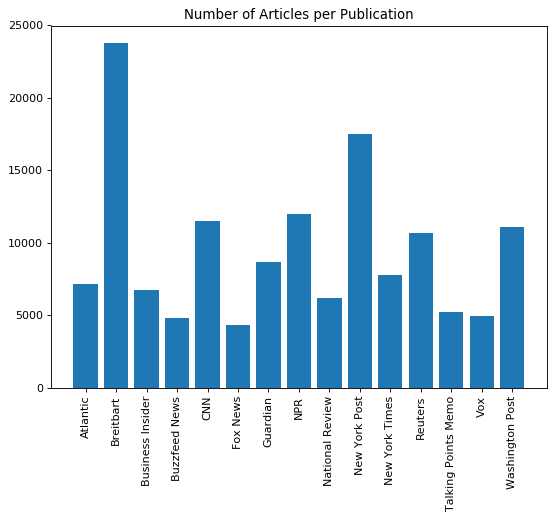

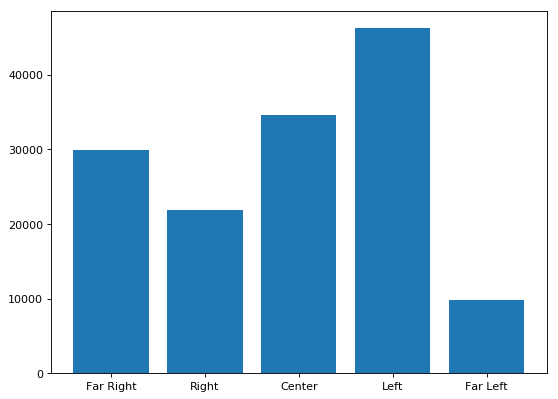

In [3]:
with open("articlesmerge.json") as mf:
    merge=json.load(mf)
    pubs=sorted(Counter(i['publication'] for i in merge).items())
    plabels=[]
    pvalues=[]
    for i in range(len(pubs)):
        plabels.append(pubs[i][0])
        pvalues.append(pubs[i][1])
    plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')  
    plt.xticks(rotation=90)
    plt.title('Number of Articles per Publication')
    plt.bar(plabels, pvalues)
with open("articlesmerge.json") as mf2:
    merge2=json.load(mf2)
    bias=sorted(Counter(i['bias'] for i in merge2).items())
    blabels=[]
    bvalues=[]
    for i in range(len(bias)):
        blabels.append(bias[i][0])
        bvalues.append(bias[i][1])
        print(blabels,bvalues)
    order=[2,4,0,3,1];blabels=[blabels[i] for i in order];bvalues=[bvalues[i] for i in order]
    plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(blabels, bvalues)

['Center', 'Far Left', 'Far Right', 'Left', 'Right']
[8550.529478331708, 2844.07703593167, 6805.295036065772, 12520.48096002147, 5714.339067377]
[[0.24660483599145466, 0.2901823319999663, 0.22696421545043263, 0.2706253314605311, 0.26156172780596876]]
['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News', 'CNN', 'Fox News', 'Guardian', 'NPR', 'National Review', 'New York Post', 'New York Times', 'Reuters', 'Talking Points Memo', 'Vox', 'Washington Post']
[7179, 23781, 6757, 4854, 11488, 4354, 8681, 11992, 6203, 17493, 7803, 10710, 5214, 4947, 11114]
[1353.6722834572872, 5589.519883833739, 2302.677975552231, 1244.5624921837448, 2309.353406454666, 968.403770220519, 2266.2772144152273, 2987.10800211363, 1215.7751522320298, 4745.935297156517, 3448.844095857914, 2087.484560069568, 1173.2589405964443, 1599.5145437479218, 3142.3339598364582]
[[0.18856000605339004, 0.23504141473587062, 0.3407840721551326, 0.25639935974119177, 0.20102310292954964, 0.22241703496107465, 0.2610617687380748,

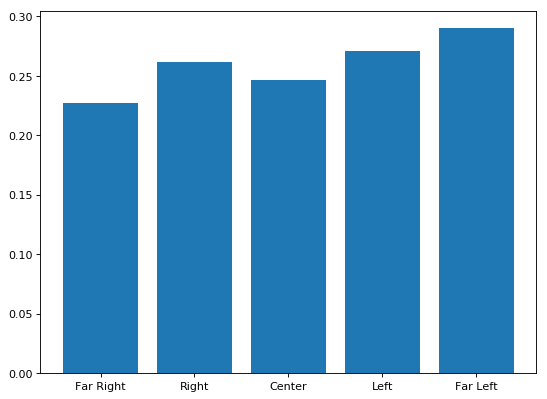

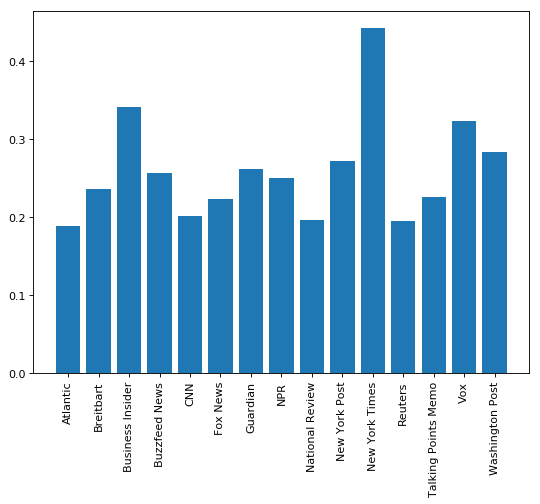

In [47]:
with open("articlesmerge.json") as mf2:
    merge2=json.load(mf2)
    bias=sorted(Counter(i['bias'] for i in merge2).items())
    blabels=[]
    bvalues=[]
    bsumsubj=[]
    bavgsubj=[]
    for i in range(len(bias)):
        blabels.append(bias[i][0])
        bvalues.append(bias[i][1])
    print(blabels)
    for b in range(len(blabels)):
        bsumsubj.append(0)
        for m in range(len(merge)):
            if merge[m]['bias'] == blabels[b]:
                bsumsubj[b]+=merge[m]['subjectivity']
    print(bsumsubj)
    bavgsubj.append([bsumsubj[i]/bvalues[i] for i in range(len(blabels))])
    print(bavgsubj)
    order=[2,4,0,3,1];blabels=[blabels[i] for i in order];bavgsubj=[bavgsubj[0][i] for i in order]
    plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(blabels, bavgsubj)
with open("articlesmerge.json") as mf2:
    merge2=json.load(mf2)
    pubs=sorted(Counter(i['publication'] for i in merge2).items())
    plabels=[]
    pvalues=[]
    psumsubj=[]
    pavgsubj=[]
    for i in range(len(pubs)):
        plabels.append(pubs[i][0])
        pvalues.append(pubs[i][1])
    print(plabels)
    print(pvalues)
    for p in range(len(plabels)):
        psumsubj.append(0)
        for m in range(len(merge)):
            if merge[m]['publication'] == plabels[p]:
                psumsubj[p]+=merge[m]['subjectivity']
    print(psumsubj)
    pavgsubj.append([psumsubj[i]/pvalues[i] for i in range(len(plabels))])
    print(pavgsubj)
    plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xticks(rotation=90)
    plt.bar(plabels, pavgsubj[0])
    

['Center', 'Far Left', 'Far Right', 'Left', 'Right']
[1300.8766222111524, 389.9850657166898, 316.1592172792465, 1880.1942553037184, 424.17688199300113]
[[0.037518432850089475, 0.03979033422270072, 0.010544264183539438, 0.04063966833035163, 0.019415795394928416]]
['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News', 'CNN', 'Fox News', 'Guardian', 'NPR', 'National Review', 'New York Post', 'New York Times', 'Reuters', 'Talking Points Memo', 'Vox', 'Washington Post']
[7179, 23781, 6757, 4854, 11488, 4354, 8681, 11992, 6203, 17493, 7803, 10710, 5214, 4947, 11114]
[192.3849832343575, 229.80947107637488, 406.8675825239561, 136.02553138990606, 280.562060092685, 72.81077860565303, 284.30855298867795, 523.0193694037445, 86.34974620287105, 351.3661033873507, 868.9846367579069, 212.23827191327098, 158.75139837014822, 253.9595343267834, 253.95402223008256]
[[0.02679829826359625, 0.009663574747755557, 0.06021423450110346, 0.028023389243903185, 0.02442218489664737, 0.016722732798726006, 0.0

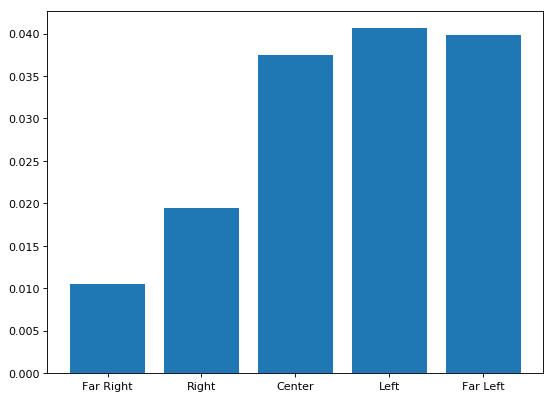

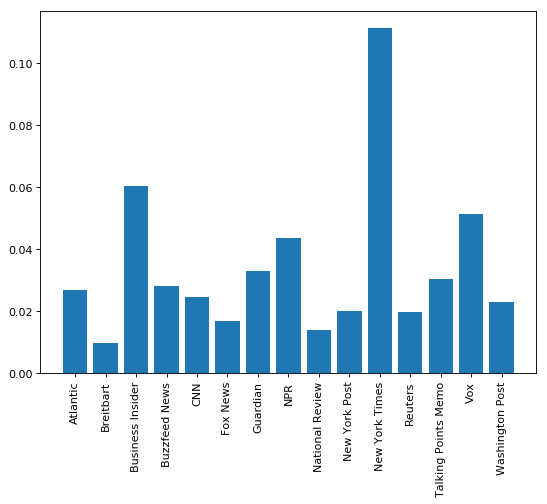

In [48]:
with open("articlesmerge.json") as mf2:
    merge2=json.load(mf2)
    bias=sorted(Counter(i['bias'] for i in merge2).items())
    blabels=[]
    bvalues=[]
    bsumpolar=[]
    bavgpolar=[]
    for i in range(len(bias)):
        blabels.append(bias[i][0])
        bvalues.append(bias[i][1])
    print(blabels)
    for b in range(len(blabels)):
        bsumpolar.append(0)
        for m in range(len(merge)):
            if merge[m]['bias'] == blabels[b]:
                bsumpolar[b]+=merge[m]['polarity']
    print(bsumpolar)
    bavgpolar.append([bsumpolar[i]/bvalues[i] for i in range(len(blabels))])
    print(bavgpolar)
    order=[2,4,0,3,1];blabels=[blabels[i] for i in order];bavgpolar=[bavgpolar[0][i] for i in order]
    plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.bar(blabels, bavgpolar)
with open("articlesmerge.json") as mf2:
    merge2=json.load(mf2)
    pubs=sorted(Counter(i['publication'] for i in merge2).items())
    plabels=[]
    pvalues=[]
    psumpolar=[]
    pavgpolar=[]
    for i in range(len(pubs)):
        plabels.append(pubs[i][0])
        pvalues.append(pubs[i][1])
    print(plabels)
    print(pvalues)
    for p in range(len(plabels)):
        psumpolar.append(0)
        for m in range(len(merge)):
            if merge[m]['publication'] == plabels[p]:
                psumpolar[p]+=merge[m]['polarity']
    print(psumpolar)
    pavgpolar.append([psumpolar[i]/pvalues[i] for i in range(len(plabels))])
    print(pavgpolar)
    plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xticks(rotation=90)
    plt.bar(plabels, pavgpolar[0])

In [ ]:
# with open("Desktop/articlesmerge.json") as mf2:
#     merge2=json.load(mf2)
#     pubs=sorted(Counter(i['publication'] for i in merge2).items())
#     plabels=[]
#     pvalues=[]
#     polar=[]
#     for i in range(len(pubs)):
#         plabels.append(pubs[i][0])
#         pvalues.append(pubs[i][1])
#     print(plabels)
#     print(pvalues)
#     for p in range(len(plabels)):
#         polar.append([])
#         for m in range(len(merge)):
#             if merge[m]['publication'] == plabels[p]:
#                 polar[p].append(merge[m]['polarity'])
#     #print(polar)
# #     plt.plot(polar)
#     plt.xlabel("X-axis")
#     plt.ylabel("Y-axis")
#     plt.title("A test graph")
#     for i in range(len(plabels)):
#         for p in range(len(polar[i])):
#             plt.scatter(plabels[i],polar[i][p],label = 'id %s'%i)
#     plt.legend()
#     plt.xticks(rotation=90)
#     plt.show()
# #     fig=plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# #     polscat=fig.add_axes([0,0,1,1])
# #     polscat.set_ylabel('Polarity Score')
# #     polscat.set_xlabel('Publication')
# #     polscat.scatter(polar,plabels)
# #     plt.bar(plabels, pavgpolar[0])

In [ ]:
# with open("Desktop/articlesmerge.json") as mf2:
#     merge=json.load(mf2)
#     pubs=sorted(Counter(i['publication'] for i in merge2).items())
#     plabels=[]
#     pvalues=[]
#     subj=[]
#     for i in range(len(pubs)):
#         plabels.append(pubs[i][0])
#         pvalues.append(pubs[i][1])
#     print(plabels)
#     print(pvalues)
#     for p in range(len(plabels)):
#         subj.append([])
#         for m in range(len(merge)):
#             if merge[m]['publication'] == plabels[p]:
#                 subj[p].append(merge[m]['subjectivity'])
#     plt.xlabel("X-axis")
#     plt.ylabel("Y-axis")
#     plt.title("A test graph")
#     for i in range(len(plabels)):
#         for p in range(len(subj[i])):
#             plt.scatter(plabels[i],subj[i][p],label = 'id %s'%i)
#     plt.legend()
#     plt.xticks(rotation=90)
#     plt.show()
# #     fig=plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# #     polscat=fig.add_axes([0,0,1,1])
# #     polscat.set_ylabel('Polarity Score')
# #     polscat.set_xlabel('Publication')
# #     polscat.scatter(polar,plabels)
# #     plt.bar(plabels, pavgpolar[0])

In [ ]:
# with open("Desktop/articlesmerge.json") as mf2:
#     merge=json.load(mf2)
#     pubs=sorted(Counter(i['publication'] for i in merge2).items())
#     plabels=[]
#     pvalues=[]
#     subj=[]
#     polar=[]
#     for i in range(len(pubs)):
#         plabels.append(pubs[i][0])
#         pvalues.append(pubs[i][1])
#     print(plabels)
#     print(pvalues)
#     for p in range(len(plabels))
#         polar.append([])
#         subj.append([])
#         for m in range(len(merge)):
#             if merge[m]['publication'] == plabels[p]:
#                 subj[p].append(merge[m]['subjectivity']) 
#                 polar[p].append(merge[m]['polarity'])
                
# #     polar=np.array([polar], dtype=object)
# #     subj=np.array([subj], dtype=object)
#     plt.xlabel("Polarity")
#     plt.ylabel("Subjectivity")
#     plt.title("Polarity vs. Subjectivity")   
#     plt.legend(plabels)
#     for i in range(len(polar)):
#         plt.scatter(polar[i],subj[i])
# #     plt.show()
# #     fig=plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# #     polscat=fig.add_axes([0,0,1,1])
# #     polscat.set_ylabel('Polarity Score')
# #     polscat.set_xlabel('Publication')
# #     polscat.scatter(polar,plabels)
# #     plt.bar(plabels, pavgpolar[0])

['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News', 'CNN', 'Fox News', 'Guardian', 'NPR', 'National Review', 'New York Post', 'New York Times', 'Reuters', 'Talking Points Memo', 'Vox', 'Washington Post']
[7179, 23781, 6757, 4854, 11488, 4354, 8681, 11992, 6203, 17493, 7803, 10710, 5214, 4947, 11114]


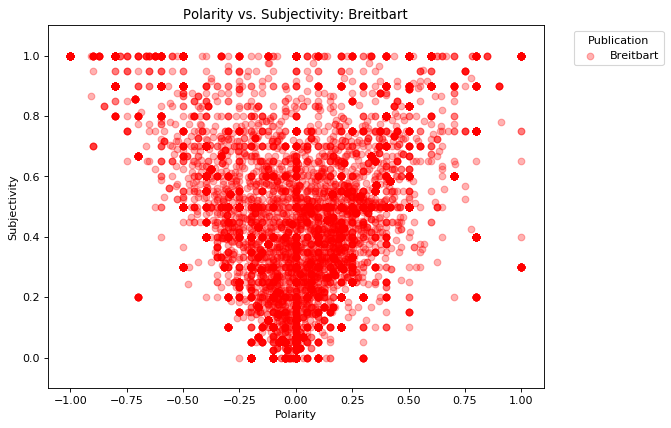

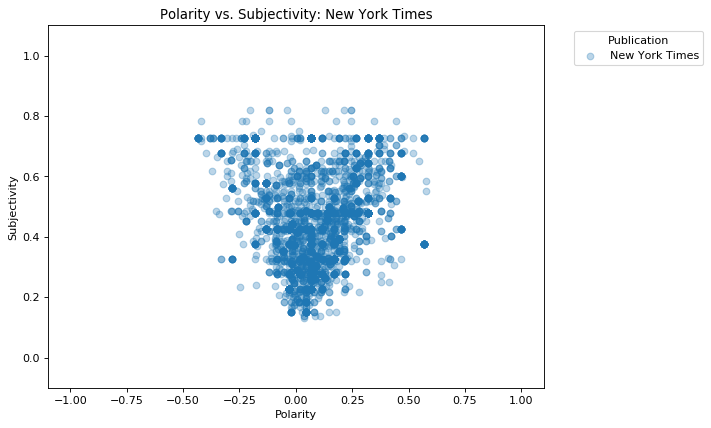

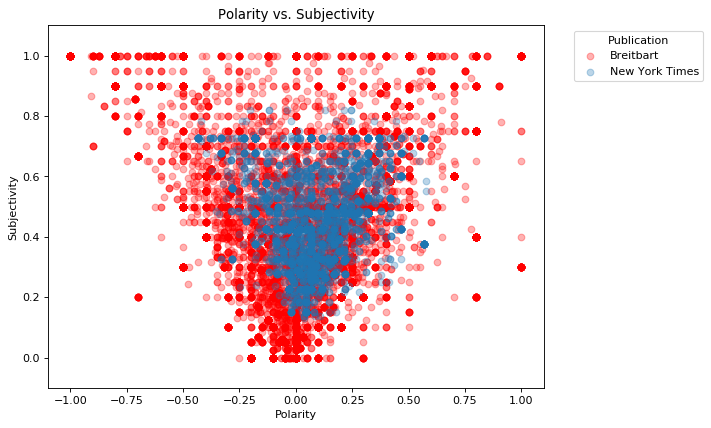

In [51]:
with open("articlesmerge.json") as mf2:
    merge=json.load(mf2)
    pubs=sorted(Counter(i['publication'] for i in merge).items())
    plabels=[]
    pvalues=[]
    subj=[]
    polar=[]
    for i in range(len(pubs)):
        plabels.append(pubs[i][0])
        pvalues.append(pubs[i][1])
    print(plabels)
    print(pvalues)
    polar.append([])
    subj.append([])
    for m in range(len(merge)):
        if merge[m]['publication'] == plabels[1]:
            subj[0].append(merge[m]['subjectivity']) 
            polar[0].append(merge[m]['polarity'])
    polar.append([])
    subj.append([])
    for m in range(len(merge)):
        if merge[m]['publication'] == plabels[10]:
            subj[1].append(merge[m]['subjectivity']) 
            polar[1].append(merge[m]['polarity'])
                
#     polar=np.array([polar], dtype=object)
#     subj=np.array([subj], dtype=object)
    plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel("Polarity")
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.ylabel("Subjectivity")
    plt.title("Polarity vs. Subjectivity: "+plabels[1])   
    plt.legend(plabels)
    plt.scatter(polar[0],subj[0],label=plabels[1],alpha=0.3, color='r')
    plt.legend(title="Publication", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel("Polarity")
    plt.ylabel("Subjectivity")
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.title("Polarity vs. Subjectivity: "+plabels[10])   
    plt.legend(plabels)
    plt.scatter(polar[1],subj[1],label=plabels[10],alpha=0.3)
    plt.legend(title="Publication", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.figure(num=2, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel("Polarity")
    plt.ylabel("Subjectivity")
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.title("Polarity vs. Subjectivity")   
    plt.legend(plabels)
    plt.scatter(polar[0],subj[0],label=plabels[1],alpha=0.3, color='r')
    plt.scatter(polar[1],subj[1],label=plabels[10],alpha=0.3)
    plt.legend(title="Publication", bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()
#     fig=plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#     polscat=fig.add_axes([0,0,1,1])
#     polscat.set_ylabel('Polarity Score')
#     polscat.set_xlabel('Publication')
#     polscat.scatter(polar,plabels)
#     plt.bar(plabels, pavgpolar[0])

['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News', 'CNN', 'Fox News', 'Guardian', 'NPR', 'National Review', 'New York Post', 'New York Times', 'Reuters', 'Talking Points Memo', 'Vox', 'Washington Post']
[7179, 23781, 6757, 4854, 11488, 4354, 8681, 11992, 6203, 17493, 7803, 10710, 5214, 4947, 11114]


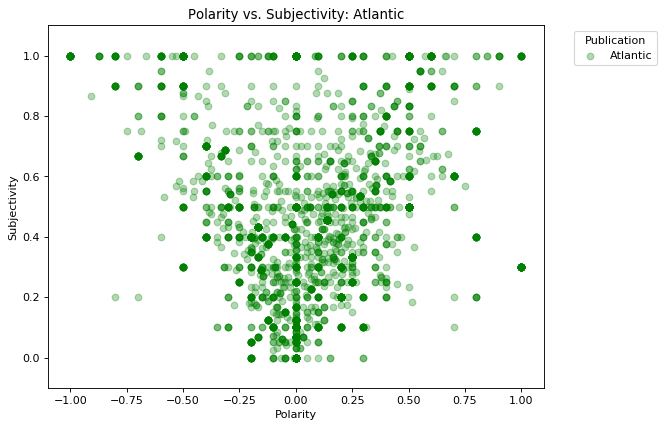

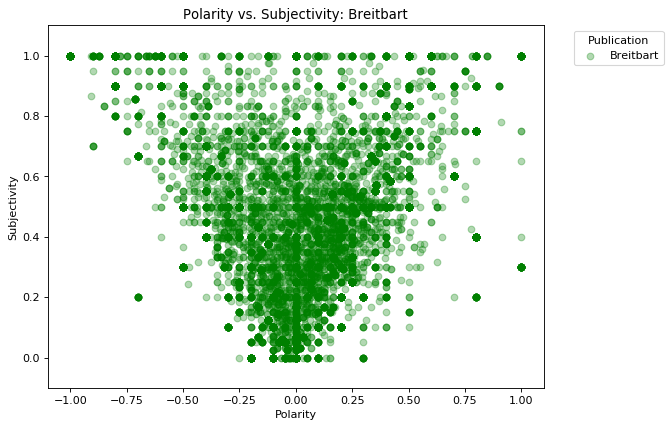

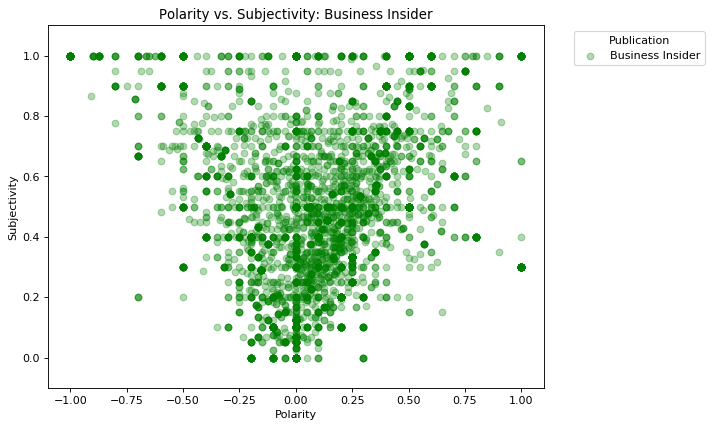

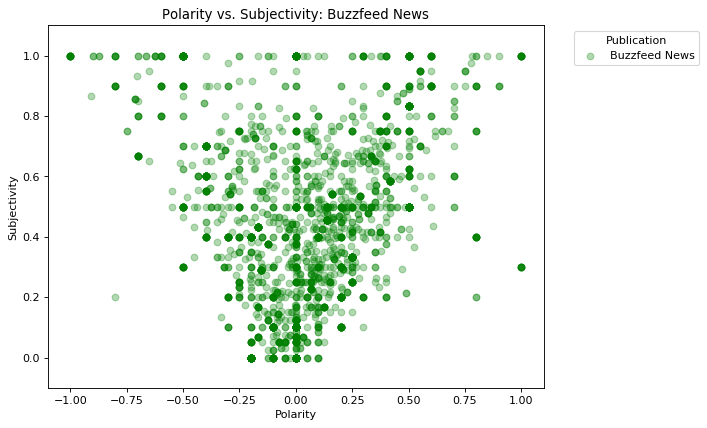

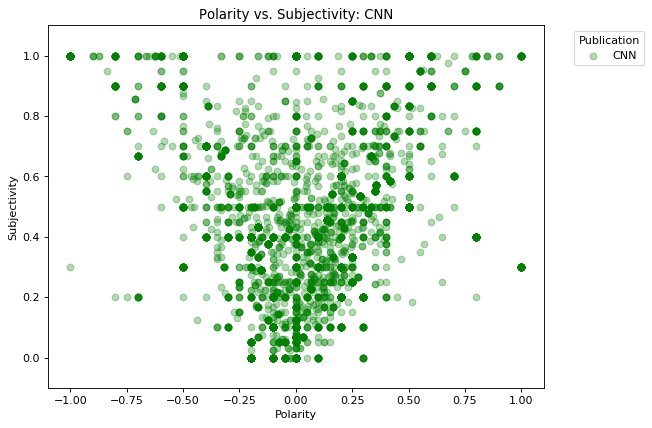

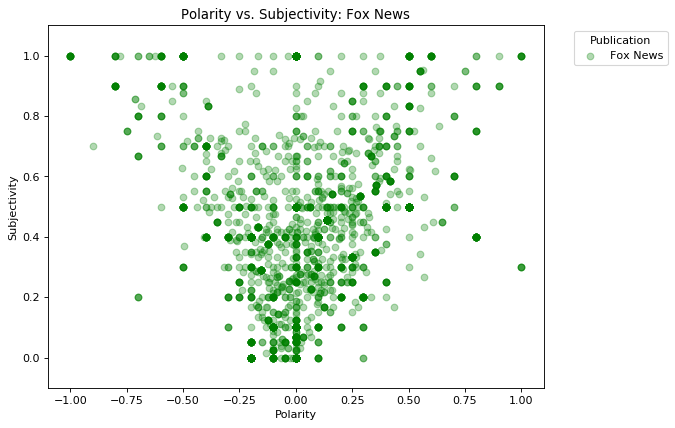

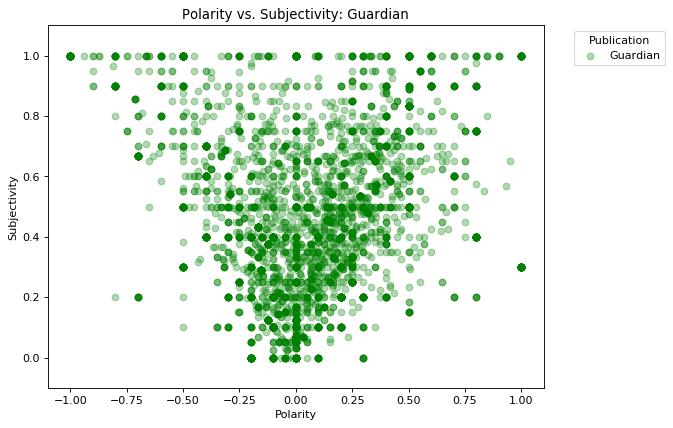

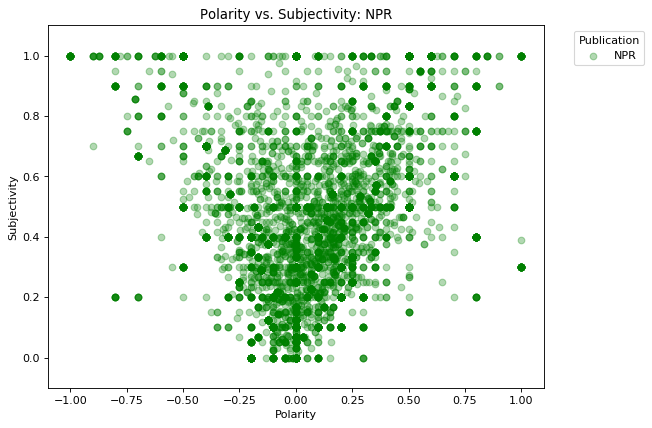

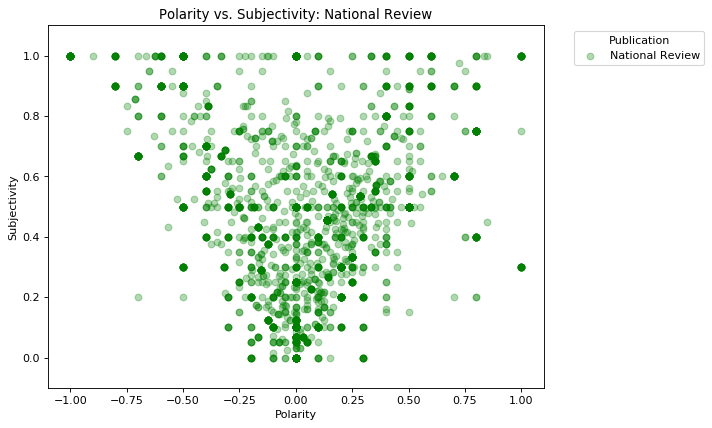

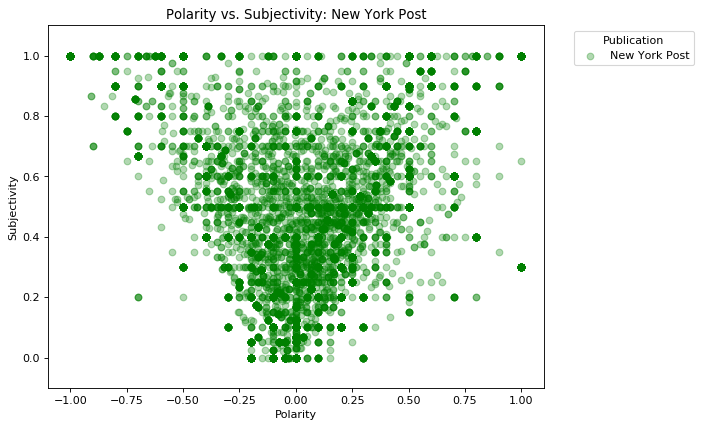

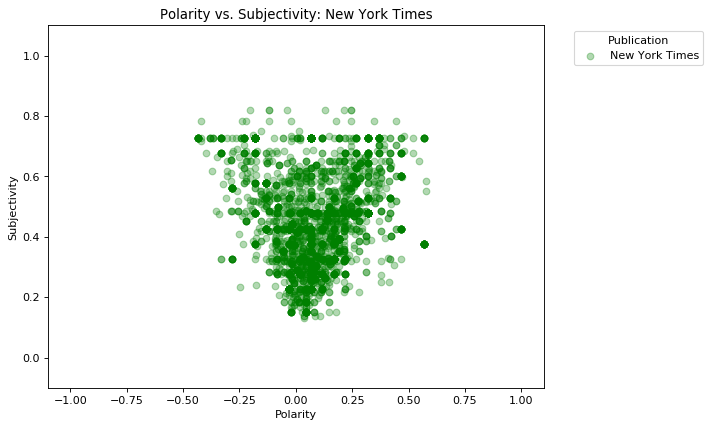

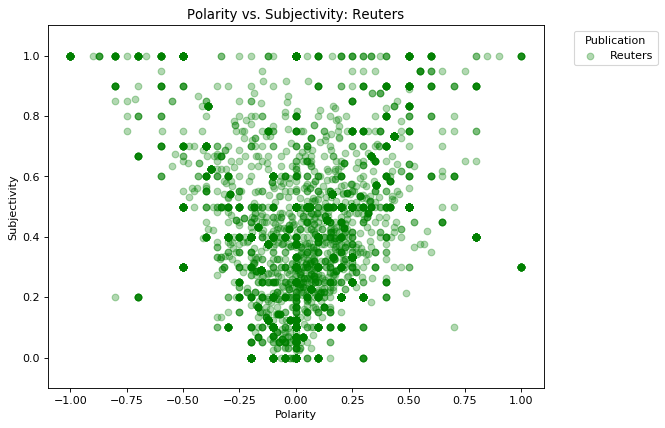

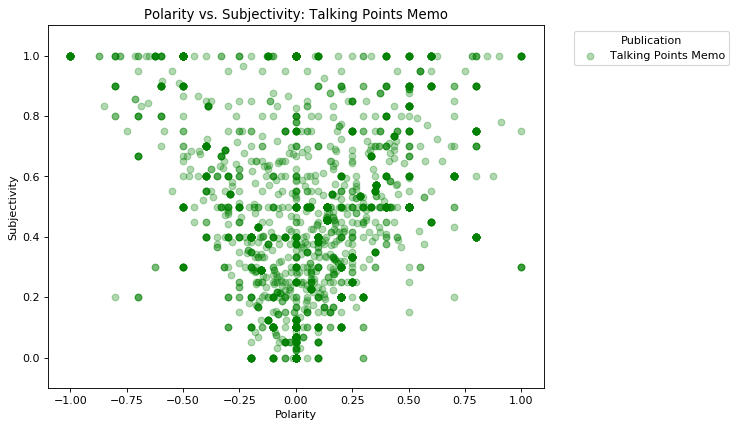

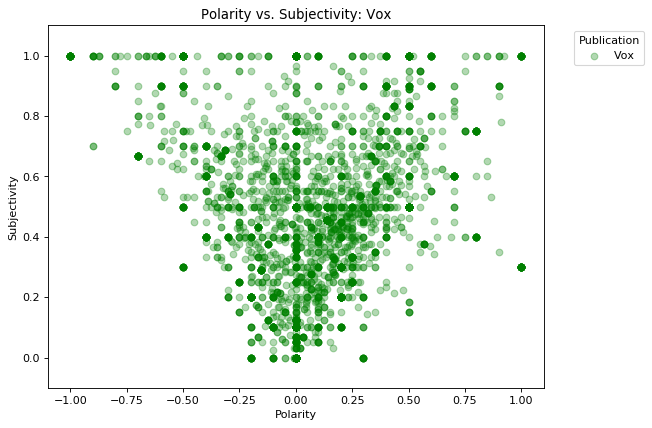

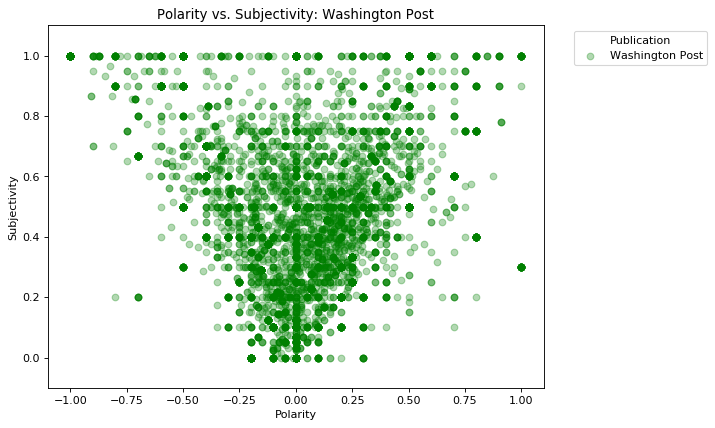

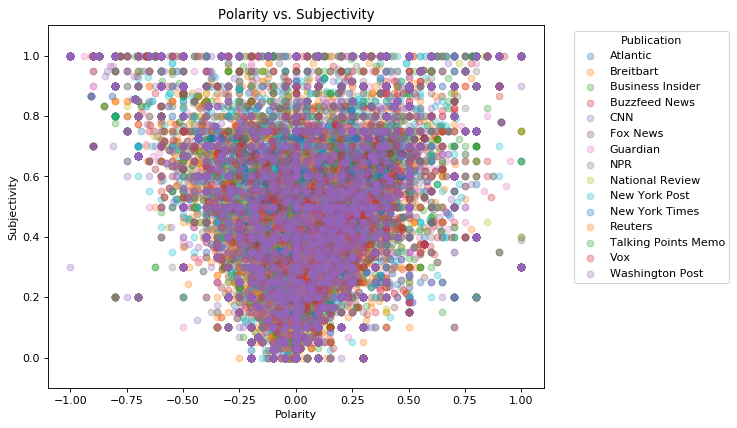

In [12]:
with open("articlesmerge.json") as mf2:
    merge=json.load(mf2)
    pubs=sorted(Counter(i['publication'] for i in merge).items())
    plabels=[]
    pvalues=[]
    subj=[]
    polar=[]
    for i in range(len(pubs)):
        plabels.append(pubs[i][0])
        pvalues.append(pubs[i][1])
    print(plabels)
    print(pvalues)
    for p in range(len(plabels)):
        polar.append([])
        subj.append([])
        for m in range(len(merge)):
            if merge[m]['publication'] == plabels[p]:
                subj[p].append(merge[m]['subjectivity']) 
                polar[p].append(merge[m]['polarity'])
                
#     polar=np.array([polar], dtype=object)
#     subj=np.array([subj], dtype=object)
    for p in range(len(plabels)):
        plt.figure(num=p, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.xlabel("Polarity")
        plt.ylabel("Subjectivity")
        plt.xlim(-1.1,1.1)
        plt.ylim(-0.1,1.1)
        plt.title("Polarity vs. Subjectivity: "+plabels[p])   
        plt.legend(plabels)
        plt.scatter(polar[p],subj[p],label=plabels[p],alpha=0.3, color='g')
        plt.legend(title="Publication", bbox_to_anchor=(1.05, 1), loc='upper left')
    for p in range(len(plabels)):
        plt.figure(num=16, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.xlabel("Polarity")
        plt.ylabel("Subjectivity")
        plt.xlim(-1.1,1.1)
        plt.ylim(-0.1,1.1)
        plt.title("Polarity vs. Subjectivity")   
        plt.legend(plabels)
        plt.scatter(polar[p],subj[p],label=plabels[p],alpha=0.3)
        plt.legend(title="Publication", bbox_to_anchor=(1.05, 1), loc='upper left')
        


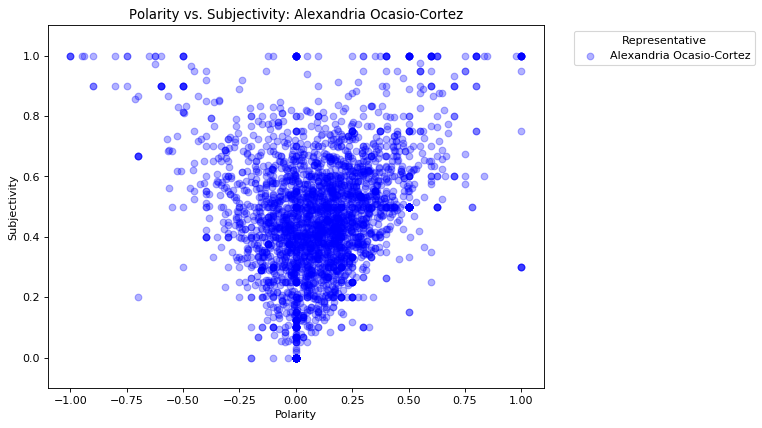

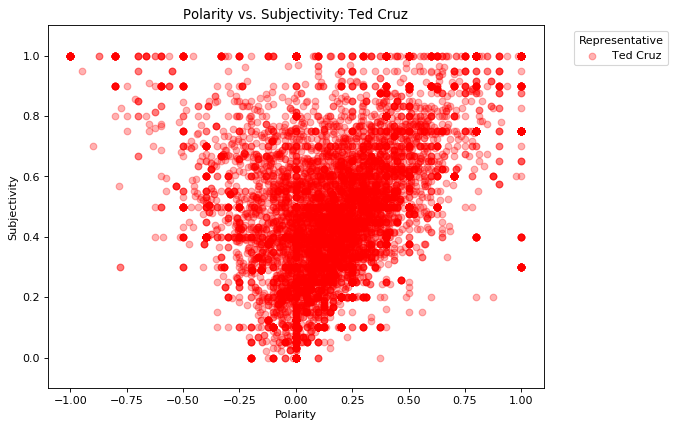

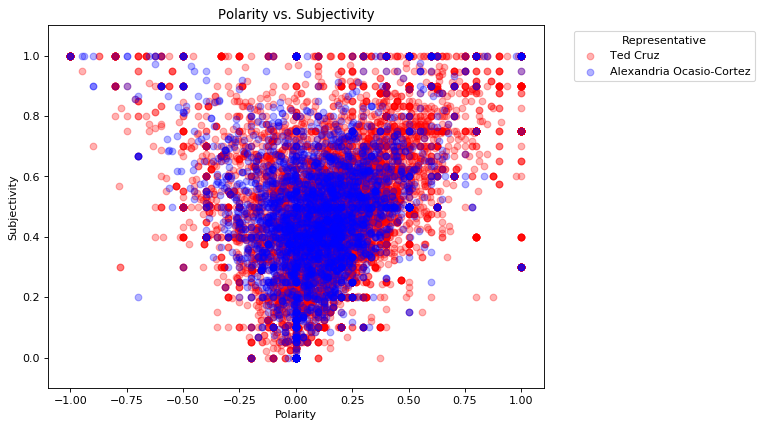

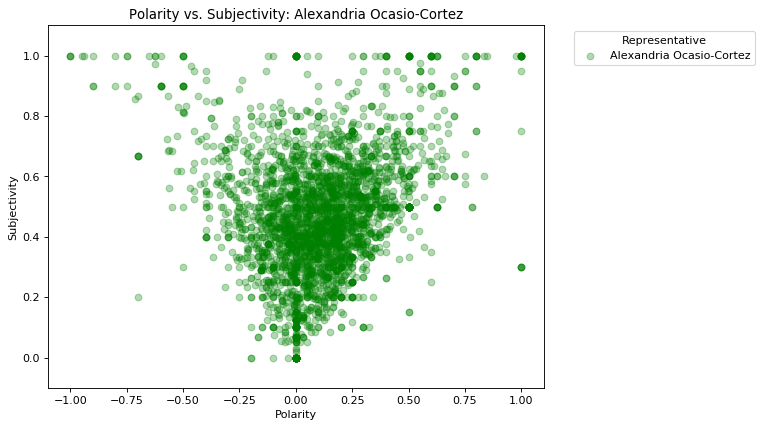

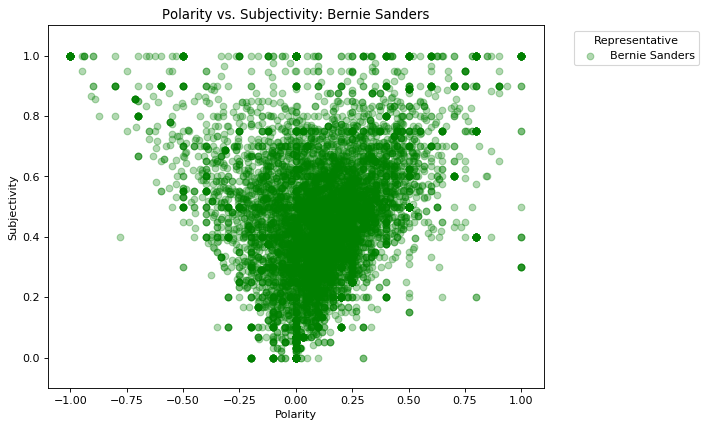

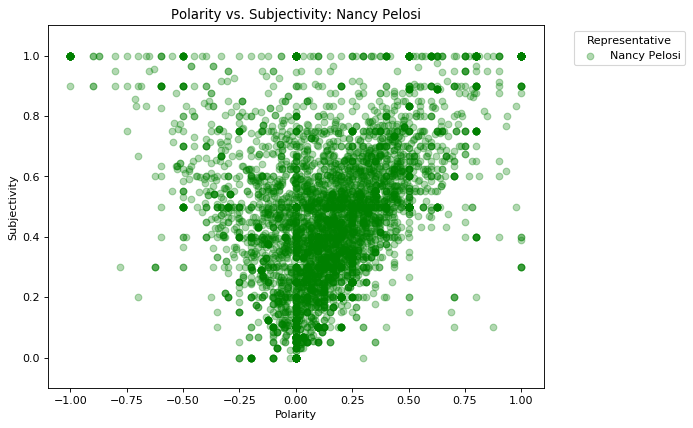

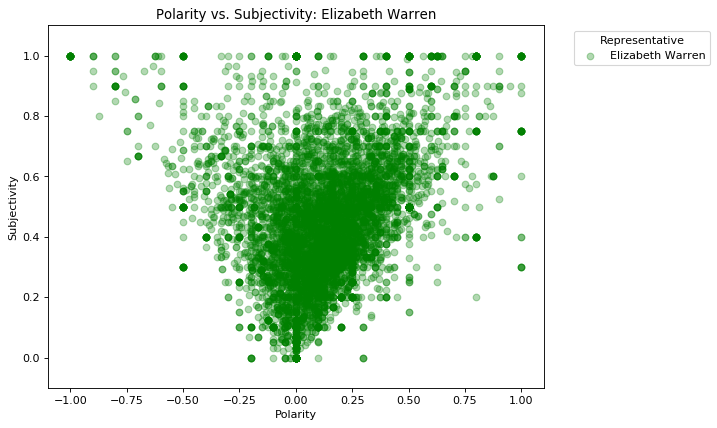

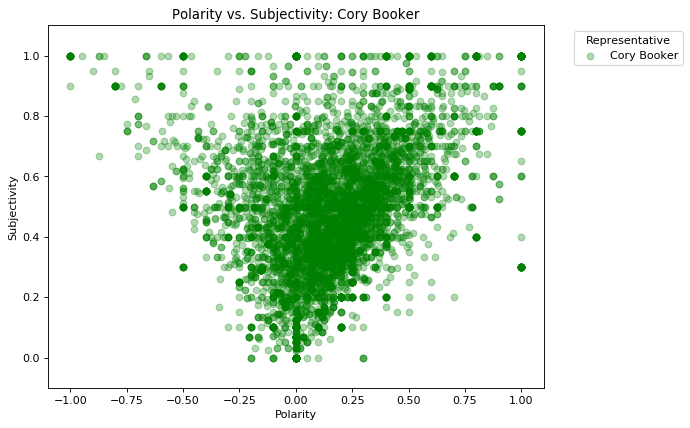

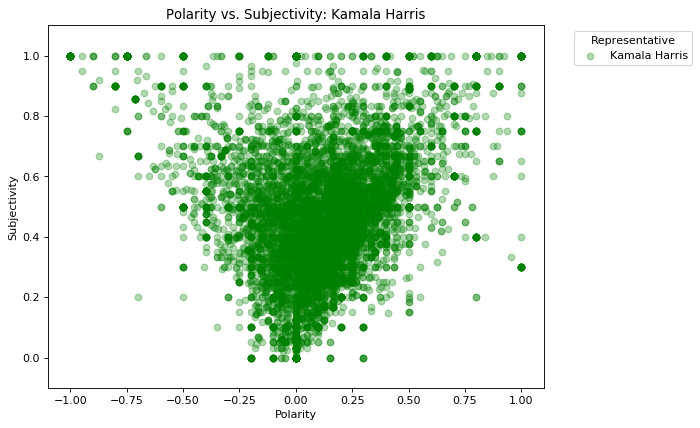

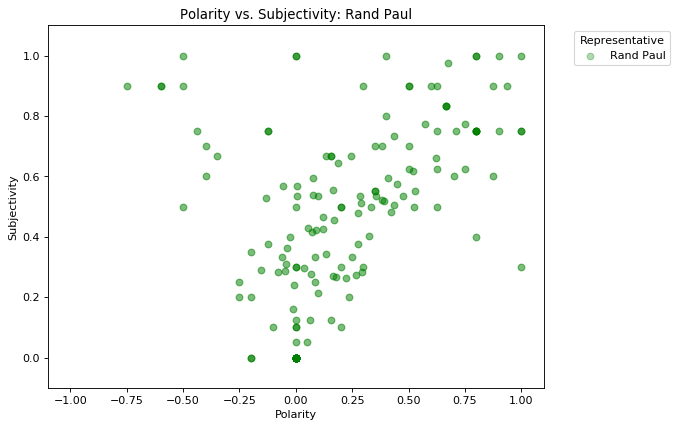

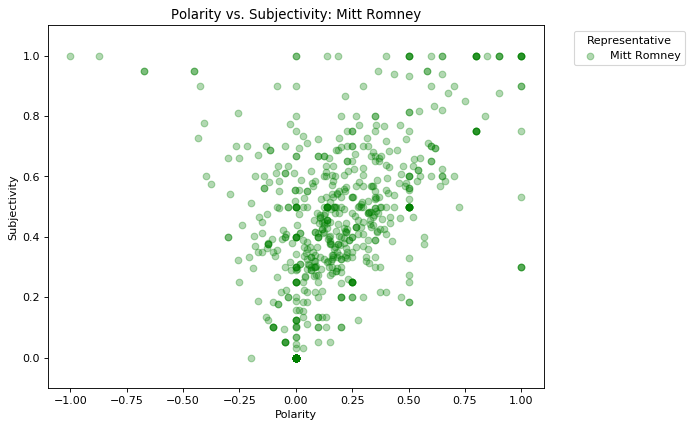

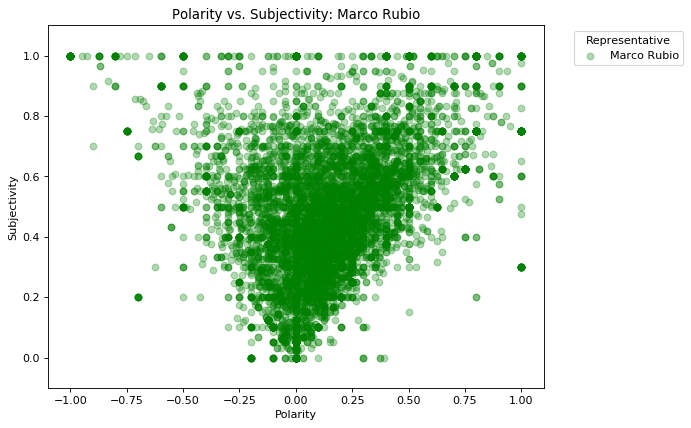

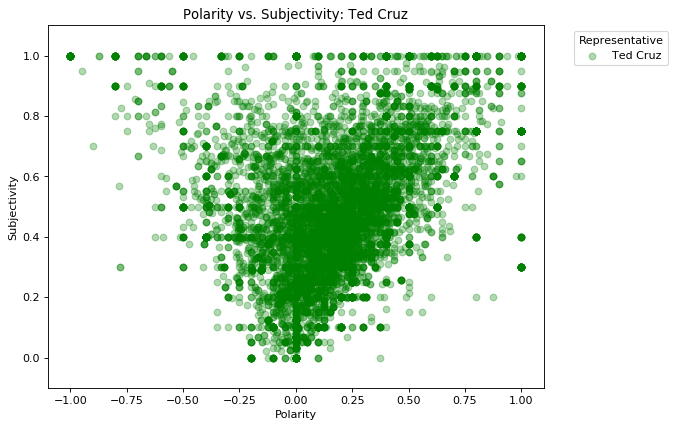

In [8]:
path_to_json = 'data_train/'
files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
labels=['Alexandria Ocasio-Cortez', 'Bernie Sanders','Nancy Pelosi','Elizabeth Warren', 'Cory Booker', 'Kamala Harris', 'Rand Paul', 'Mitt Romney','Marco Rubio','Ted Cruz']
values=[]
subj=[[] for i in range(10)]
polar=[[] for i in range(10)]
#AOC=0
#Bernie=1
#Pelosi=2
#Warren=3
#Booker=4
#Harris=5
#Paul=6
#Romney=7
#Rubio=8
#Cruz=9

for f in files:
    with open(path_to_json+f) as mf2:
        merge=json.load(mf2)
        handles=sorted(Counter(i['screen_name'] for i in merge).items())
        for i in range(len(handles)):
            values.append(handles[i][1])
#         print(labels)
#         print(values)
        for m in range(len(merge)):
            if merge[m]['screen_name'] == 'AOC':
                subj[0].append(merge[m]['subjectivity']) 
                polar[0].append(merge[m]['polarity'])
            if merge[m]['screen_name'] =='aocenespanol':
                subj[0].append(merge[m]['subjectivity']) 
                polar[0].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'BernieSanders':
                subj[1].append(merge[m]['subjectivity']) 
                polar[1].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SenSanders':
                subj[1].append(merge[m]['subjectivity']) 
                polar[1].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SpeakerPelosi':
                subj[2].append(merge[m]['subjectivity']) 
                polar[2].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'TeamPelosi':
                subj[2].append(merge[m]['subjectivity']) 
                polar[2].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SenWarren':
                subj[3].append(merge[m]['subjectivity']) 
                polar[3].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'ewarren':
                subj[3].append(merge[m]['subjectivity']) 
                polar[3].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'CoryBooker' :
                subj[4].append(merge[m]['subjectivity']) 
                polar[4].append(merge[m]['polarity'])
            if merge[m]['screen_name'] ==  'SenBooker':
                subj[4].append(merge[m]['subjectivity']) 
                polar[4].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SenBookerOffice':
                subj[4].append(merge[m]['subjectivity']) 
                polar[4].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SenKamalaHarris':
                subj[5].append(merge[m]['subjectivity']) 
                polar[5].append(merge[m]['polarity'])
            if merge[m]['screen_name'] =='KamalaHarris':
                subj[5].append(merge[m]['subjectivity']) 
                polar[5].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'DrRandPaul':
                subj[6].append(merge[m]['subjectivity']) 
                polar[6].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'DrRandPaul':
                subj[6].append(merge[m]['subjectivity']) 
                polar[6].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'MittRomney':
                subj[7].append(merge[m]['subjectivity']) 
                polar[7].append(merge[m]['polarity'])
            if merge[m]['screen_name'] =='SenatorRomney':
                subj[7].append(merge[m]['subjectivity']) 
                polar[7].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SenRubioPress':
                subj[8].append(merge[m]['subjectivity']) 
                polar[8].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'marcorubio':
                subj[8].append(merge[m]['subjectivity']) 
                polar[8].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'tedcruz' :
                subj[9].append(merge[m]['subjectivity']) 
                polar[9].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'SenTedCruz':
                subj[9].append(merge[m]['subjectivity']) 
                polar[9].append(merge[m]['polarity'])
            if merge[m]['screen_name'] == 'TeamTedCruz':
                subj[9].append(merge[m]['subjectivity']) 
                polar[9].append(merge[m]['polarity'])
#     polar=np.array([polar], dtype=object)
#     subj=np.array([subj], dtype=object)
plt.figure(num=10, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.xlim(-1.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("Polarity vs. Subjectivity: "+labels[0])   
plt.legend(labels)
plt.scatter(polar[0],subj[0],label=labels[0],alpha=0.3, color='b')
plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')
            
plt.figure(num=19, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.xlim(-1.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("Polarity vs. Subjectivity: "+labels[9])   
plt.legend(labels)
plt.scatter(polar[9],subj[9],label=labels[9],alpha=0.3, color='r')
plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')
            
plt.figure(num=16, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.xlim(-1.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("Polarity vs. Subjectivity")   
plt.legend(labels)
plt.scatter(polar[9],subj[9],label=labels[9],alpha=0.3, color='r')
plt.scatter(polar[0],subj[0],label=labels[0],alpha=0.3, color='b')
plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')

for p in range(len(labels)): #individual plots
    plt.figure(num=p, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel("Polarity")
    plt.ylabel("Subjectivity")
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.title("Polarity vs. Subjectivity: "+labels[p])   
    plt.legend(labels)
    plt.scatter(polar[p],subj[p],label=labels[p],alpha=0.3, color='g')
    plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')
#         for p in range(len(labels)): #total plots
#             plt.figure(num=16, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#             plt.xlabel("Polarity")
#             plt.ylabel("Subjectivity")
#             plt.xlim(-1.1,1.1)
#             plt.ylim(-0.1,1.1)
#             plt.title("Polarity vs. Subjectivity: Congress")   
#             plt.legend(labels)
#             plt.scatter(polar[p],subj[p],label=labels[p],alpha=0.3)
#             plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')


In [ ]:
plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.xlim(-1.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("Polarity vs. Subjectivity: "+labels[p])   
plt.legend(labels)
plt.scatter(polar[0],subj[0],label=labels[0],alpha=0.3, color='b')
plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')
            
plt.figure(num=9, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.xlim(-1.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("Polarity vs. Subjectivity: "+labels[p])   
plt.legend(labels)
plt.scatter(polar[9],subj[9],label=labels[9],alpha=0.3, color='r')
plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')
            
plt.figure(num=16, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.xlim(-1.1,1.1)
plt.ylim(-0.1,1.1)
plt.title("Polarity vs. Subjectivity: Congress")   
plt.legend(labels)
plt.scatter(polar[0],subj[0],label=labels[0],alpha=0.3)
plt.scatter(polar[9],subj[9],label=labels[9],alpha=0.3)
plt.legend(title="Representative", bbox_to_anchor=(1.05, 1), loc='upper left')

NameError: name 'polar' is not defined

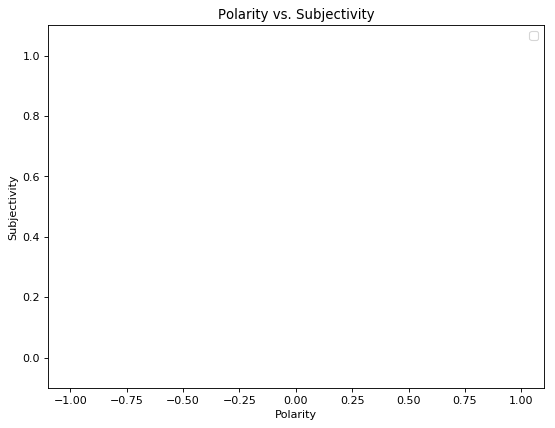

In [4]:
    plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.xlabel("Polarity")
    plt.xlim(-1.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.ylabel("Subjectivity")
    plt.title("Polarity vs. Subjectivity")   
    plt.legend(plabels)
    plt.scatter(polar[0],subj[0],label=plabels[1],alpha=0.3, color='r')
    plt.scatter(polar[0],subj[0],label=labels[0],alpha=0.3, color='b')
    plt.legend(title="Publication", bbox_to_anchor=(1.05, 1), loc='upper left')